Câu 1

In [16]:
import pandas as pd

train = pd.read_csv("dataset/adult.data.csv")
test = pd.read_csv("dataset/adult.test.csv")
print("Bùi Hoàn Duy - 6351071012")
print("Train:", len(train))
print("Test:", len(test))


Bùi Hoàn Duy - 6351071012
Train: 32561
Test: 16281


Câu 2

In [17]:
import pandas as pd

train_clean = train.replace(r'^\s*\?$', pd.NA, regex=True).dropna()
test_clean = test.replace(r'^\s*\?$', pd.NA, regex=True).dropna()
print("Bùi Hoàn Duy - 6351071012")
print("Train sau khi xoá '?':", len(train_clean))
print("Test sau khi xoá '?':", len(test_clean))

cols_to_drop = ["fnlwgt"]
train_clean = train_clean.drop(columns=[c for c in cols_to_drop if c in train_clean.columns])
test_clean = test_clean.drop(columns=[c for c in cols_to_drop if c in test_clean.columns])

data = pd.concat([train_clean, test_clean], ignore_index=True)

print("\n=== Thông tin DataFrame sau xử lý ===")
data.info()


Bùi Hoàn Duy - 6351071012
Train sau khi xoá '?': 30162
Test sau khi xoá '?': 15060

=== Thông tin DataFrame sau xử lý ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


Câu 3

Bùi Hoàn Duy - 6351071012


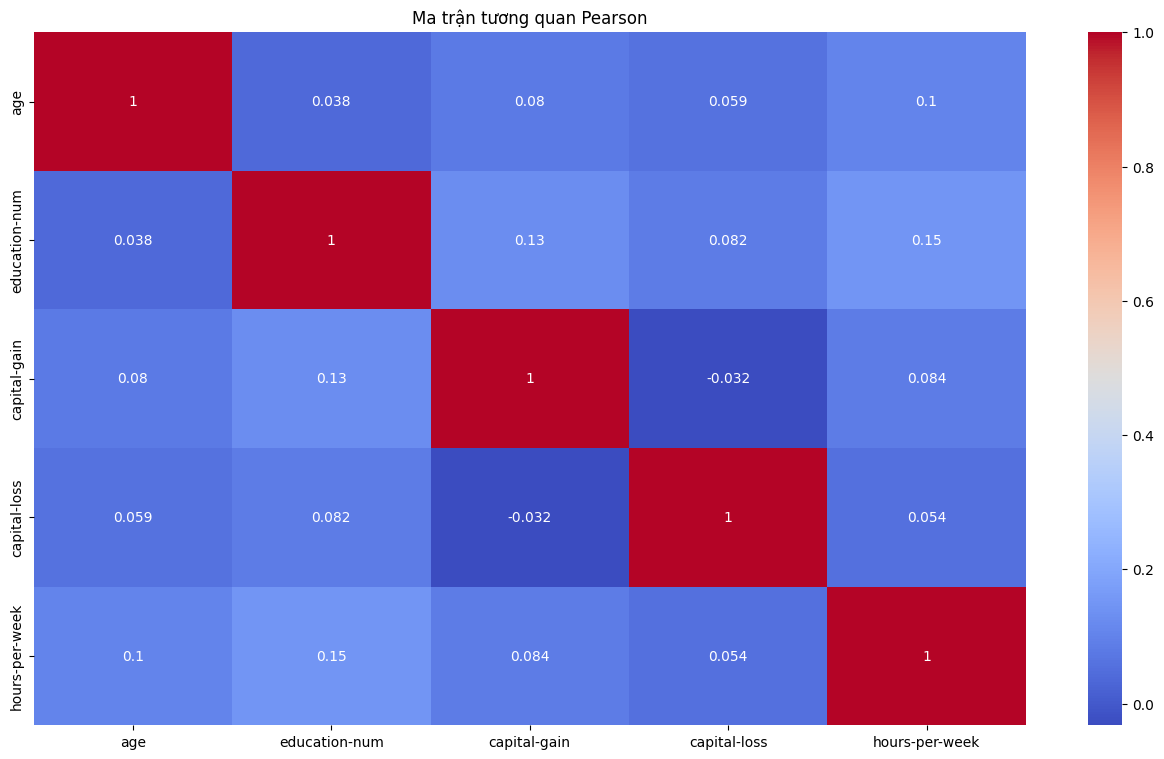


Các cột có tương quan cao muốn loại bỏ:
set()

Số cột ban đầu: 14
Số cột sau khi loại bỏ: 14


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_data.corr(method='pearson')

print("Bùi Hoàn Duy - 6351071012")
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan Pearson')
plt.show()

threshold = 0.8
columns_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            columns_to_drop.add(colname)

print("\nCác cột có tương quan cao muốn loại bỏ:")
print(columns_to_drop)

data_filtered = data.drop(columns=list(columns_to_drop))

print("\nSố cột ban đầu:", data.shape[1])
print("Số cột sau khi loại bỏ:", data_filtered.shape[1])


Câu 4

In [19]:
print("Bùi Hoàn Duy - 6351071012")
features = data.drop('income', axis=1)
labels = data['income']
print("Kích thước features:", features.shape)
print("Kích thước labels:", labels.shape)


Bùi Hoàn Duy - 6351071012
Kích thước features: (45222, 13)
Kích thước labels: (45222,)


Câu 5

In [20]:
print("Bùi Hoàn Duy - 6351071012")
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

Bùi Hoàn Duy - 6351071012


age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
45217   33             13             0             0              40   
45218   39             13             0             0              36   
45219   38             13             0             0              50   
45220   44             13          5455             0              40   
45221   35             13             0             0              60   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                       False                 False               False   
1                       False                 False               False   
2                       False                 False                True   
3                       False                 False                True   
4                       False                 False                True   
...                       ...                   ...                 ...   
45217                   False                 False                True   
45218                   False                 False                True   
45219                   False                 False                True   
45220                   False                 False                True   
45221                   False                 False               False   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                        False                        False  ...   
1                        False                         True  ...   
2                        False                        False  ...   
3                        False                        False  ...   
4                        False                        False  ...   
...                        ...                          ...  ...   
45217                    False                        False  ...   
45218                    False                        False  ...   
45219                    False                        False  ...   
45220                    False                        False  ...   
45221                     True                        False  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
...                         ...                          ...   
45217                     False                        False   
45218                     False                        False   
45219                     False                        False   
45220                     False                        False   
45221                     False                        False   

       native-country_ Scotland  native-country_ South  \
0                         False                  False   
1                         False                  False   
2                         False                  False   
3                         False                  False   
4                         False                  False   
...                         ...                    ...   
45217                     False                  False   
45218                     False                  False   
45219                     False                  False   
45220                     False                  False   
45221

Câu 6

In [21]:
# Số dòng của tập train sau khi làm sạch
n_train = len(train_clean)

# Tách tập features
X_train = features_onehot[:n_train]
X_test  = features_onehot[n_train:]

# Tách tập nhãn
y_train = labels[:n_train]
y_test  = labels[n_train:]
print("Bùi Hoàn Duy - 6351071012")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Bùi Hoàn Duy - 6351071012
X_train: (30162, 103)
X_test: (15060, 103)
y_train: (30162,)
y_test: (15060,)


Câu 7

In [22]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)

clf.fit(X_train, y_train)
print("Bùi Hoàn Duy - 6351071012")
print(clf)


Bùi Hoàn Duy - 6351071012
DecisionTreeClassifier(criterion='entropy', random_state=0)


In [23]:
# Dự đoán nhãn
tree_pred = clf.predict(X_test)
# Dự đoán nhãn
tree_pred = clf.predict(X_test)


In [24]:
# Dự đoán nhãn
tree_pred = clf.predict(X_test)


In [25]:
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Bùi Hoàn Duy - 6351071012")

print("Accuracy:", tree_score)
print("\nReport:\n", metrics.classification_report(y_test, tree_pred))


Bùi Hoàn Duy - 6351071012
Accuracy: 0.8175298804780876

Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



In [26]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
print(tree_cm)
print("Bùi Hoàn Duy - 6351071012")


[[10031  1329]
 [ 1419  2281]]
Bùi Hoàn Duy - 6351071012


Bùi Hoàn Duy - 6351071012


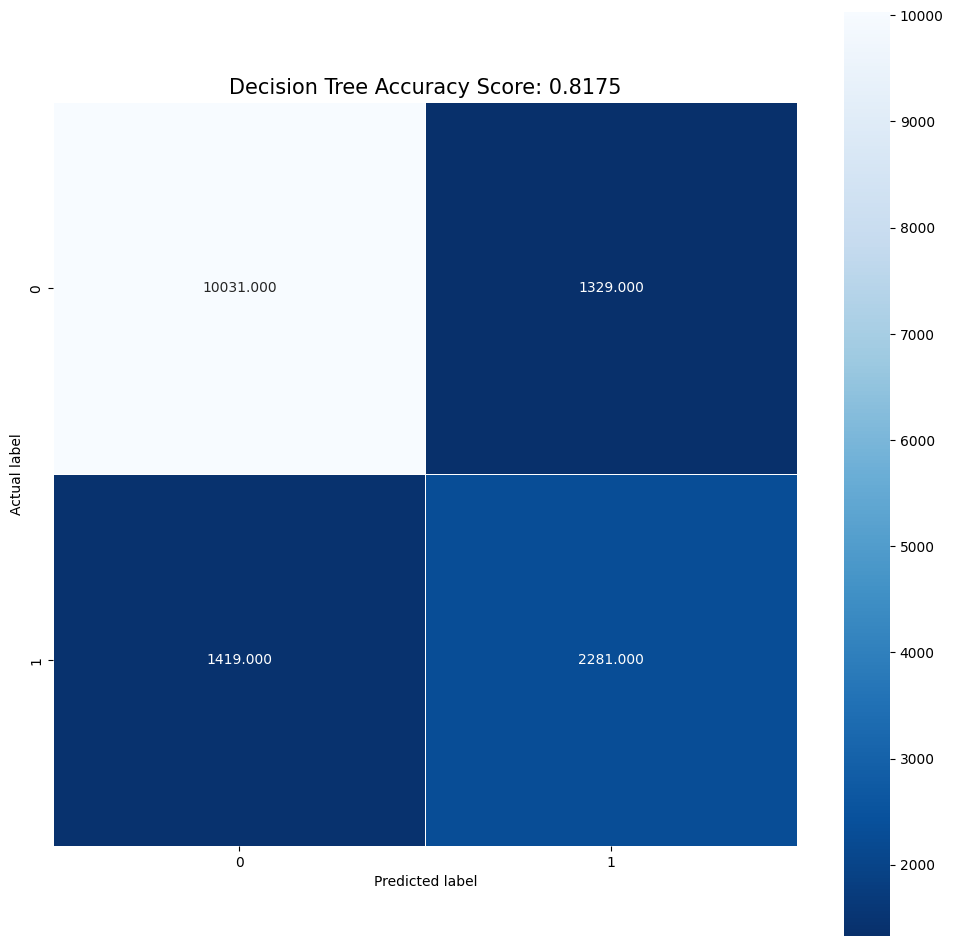

In [27]:
plt.figure(figsize=(12, 12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5,
            square=True, cmap='Blues_r')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Accuracy Score: {:.4f}'.format(tree_score), size=15)
print("Bùi Hoàn Duy - 6351071012")
plt.show()



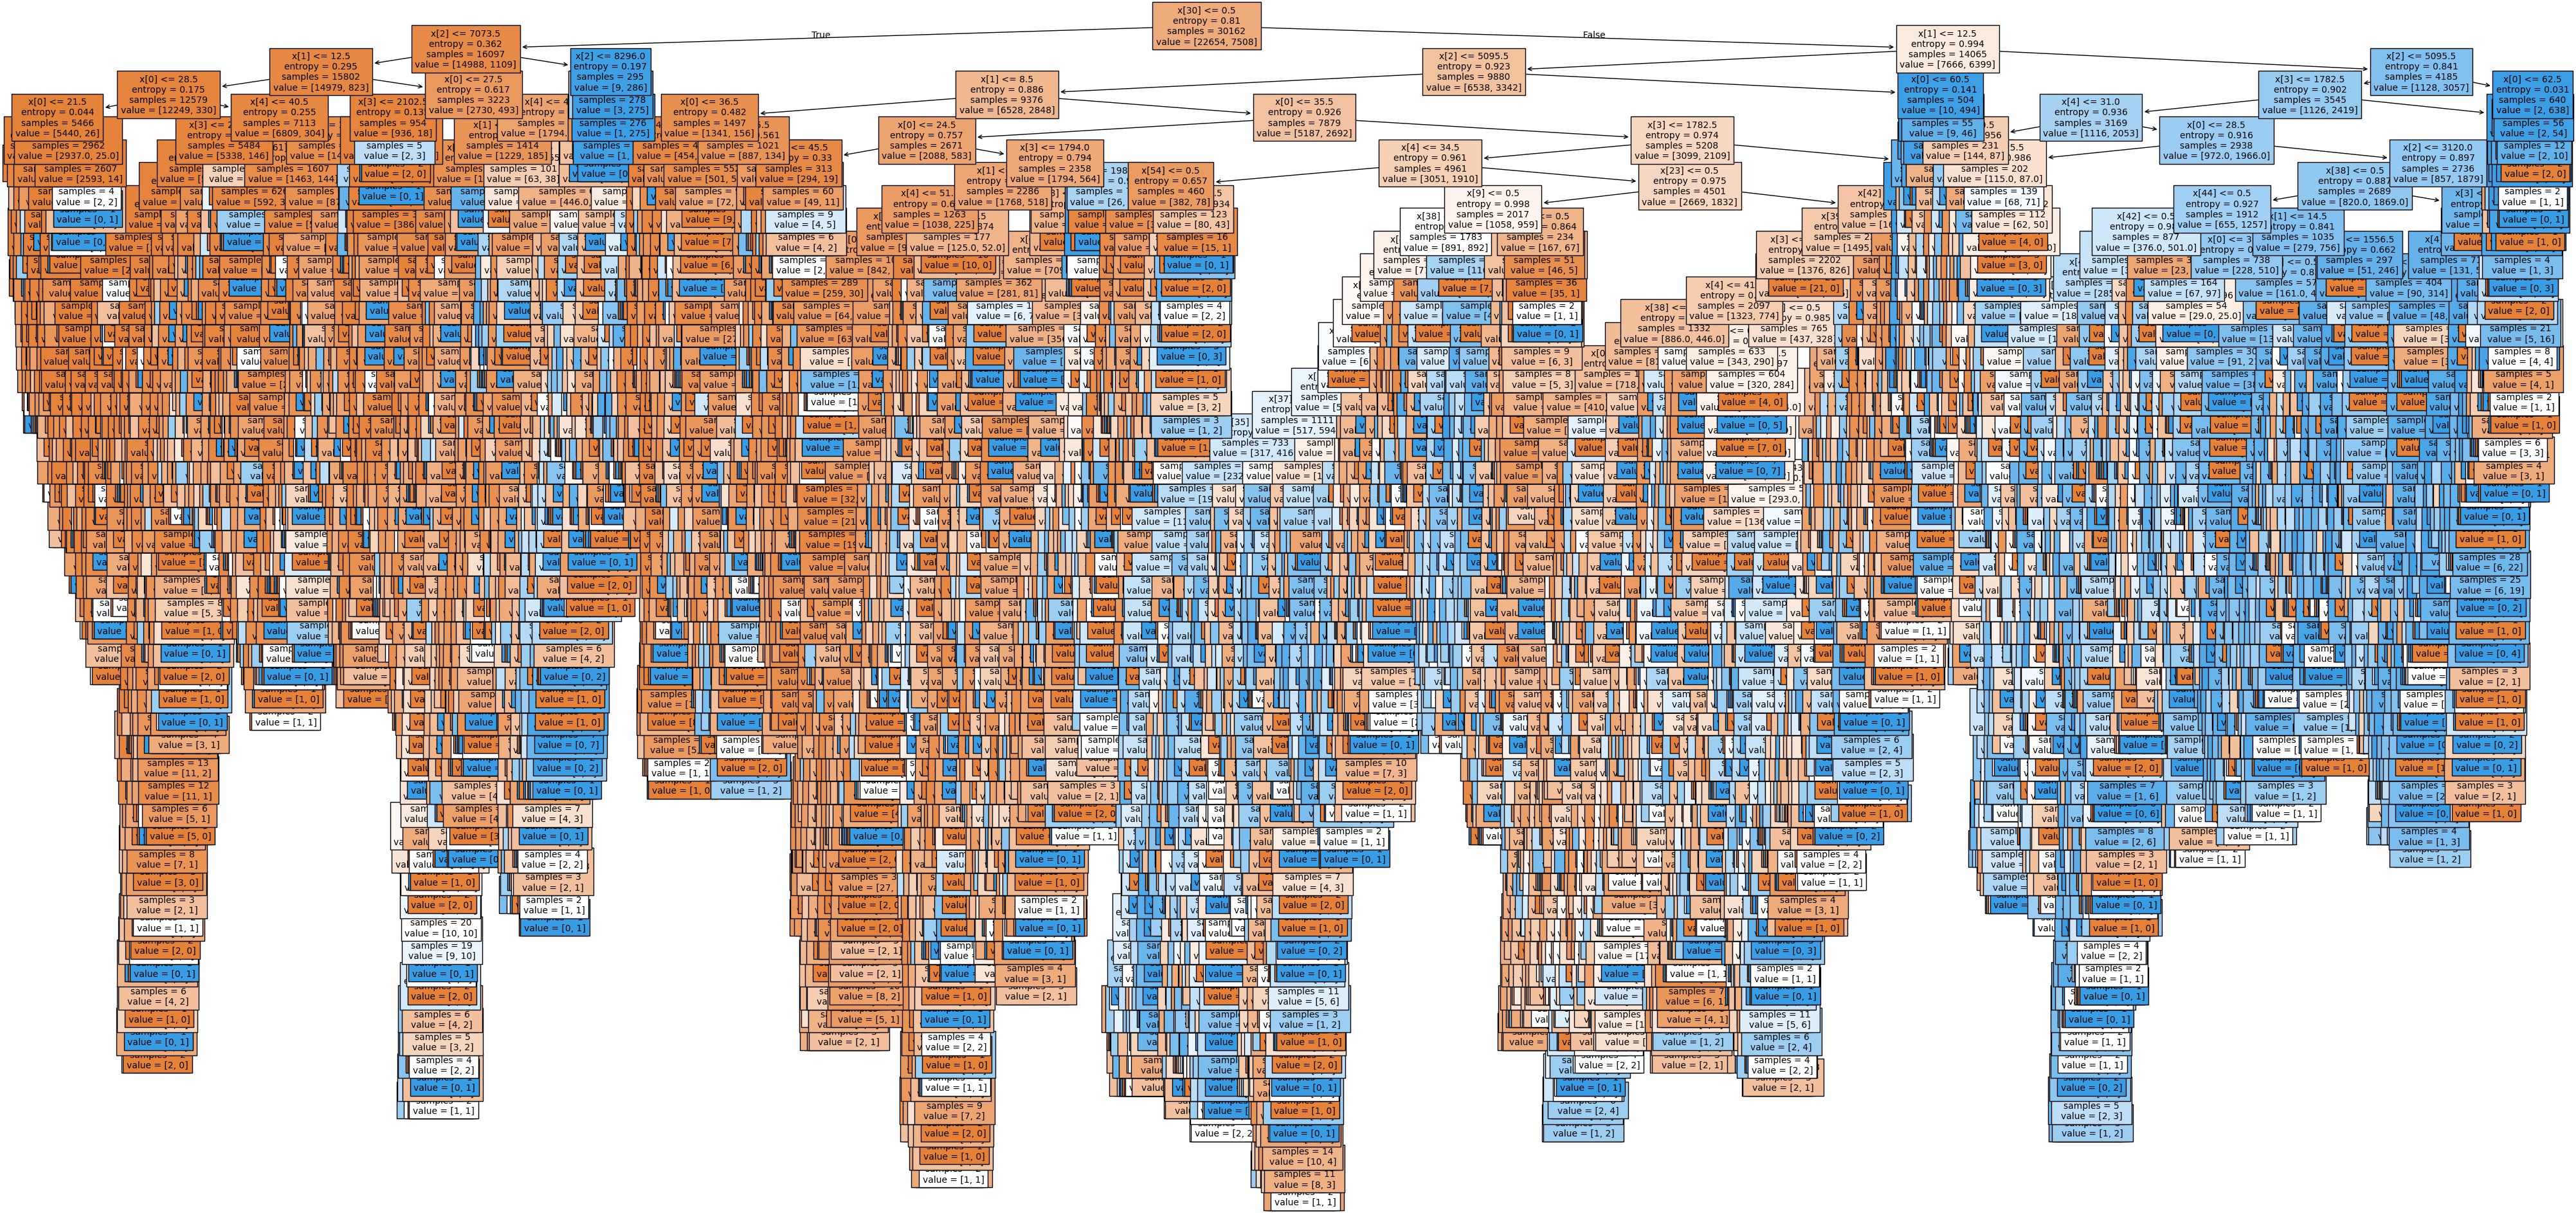

Bùi Hoàn Duy - 6351071012


In [29]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree.png', dpi=10)
plt.show()
print("Bùi Hoàn Duy - 6351071012")


Câu 8

In [30]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# 7. Huấn luyện cây ID3 (entropy)
# =============================
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="gini", random_state=0)

clf.fit(X_train, y_train)
print("Bùi Hoàn Duy - 6351071012")
print(">>> Huấn luyện xong cây ID3!")
print(clf)


Bùi Hoàn Duy - 6351071012
>>> Huấn luyện xong cây ID3!
DecisionTreeClassifier(random_state=0)


In [31]:
# Dự đoán nhãn
tree_pred = clf.predict(X_test)
# Dự đoán nhãn
tree_pred = clf.predict(X_test)


In [32]:
# Dự đoán nhãn
tree_pred = clf.predict(X_test)


In [33]:
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Bùi Hoàn Duy - 6351071012")

print("Accuracy:", tree_score)
print("\nReport:\n", metrics.classification_report(y_test, tree_pred))


Bùi Hoàn Duy - 6351071012
Accuracy: 0.8122841965471448

Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



In [34]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
print(tree_cm)
print("Bùi Hoàn Duy - 6351071012")


[[10009  1351]
 [ 1476  2224]]
Bùi Hoàn Duy - 6351071012


Bùi Hoàn Duy - 6351071012


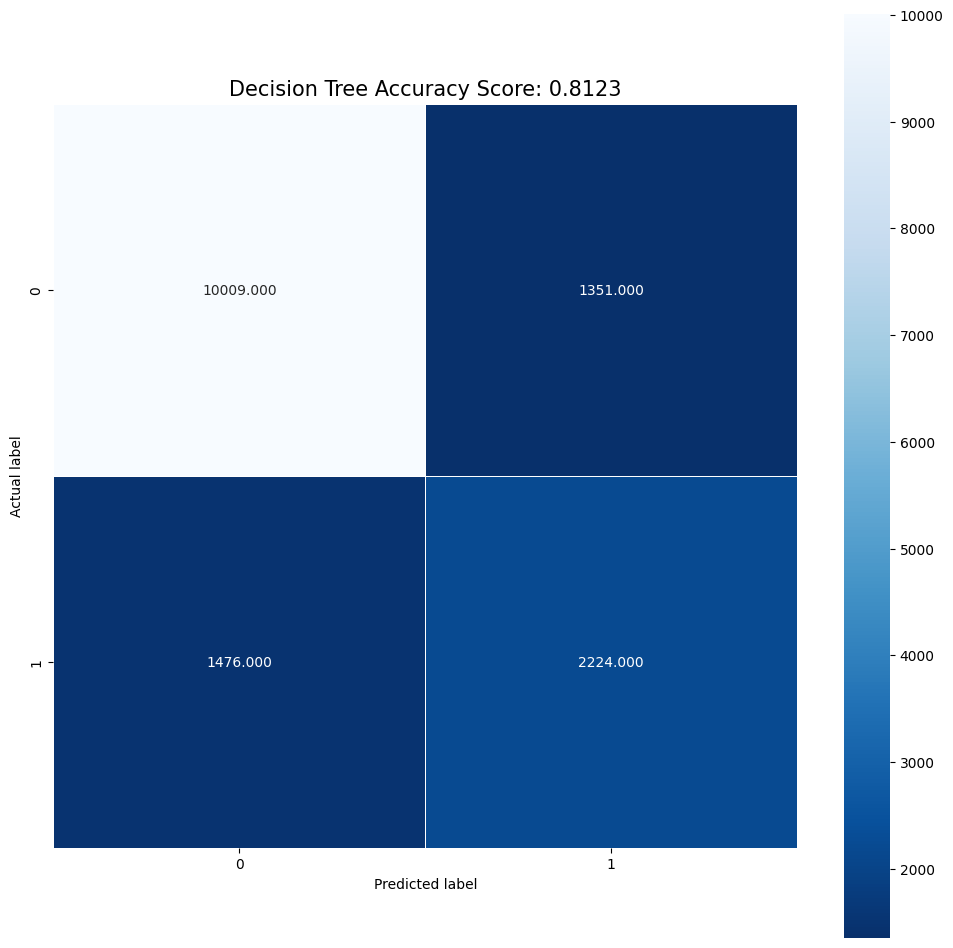

In [35]:
plt.figure(figsize=(12, 12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5,
            square=True, cmap='Blues_r')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Accuracy Score: {:.4f}'.format(tree_score), size=15)
print("Bùi Hoàn Duy - 6351071012")
plt.show()



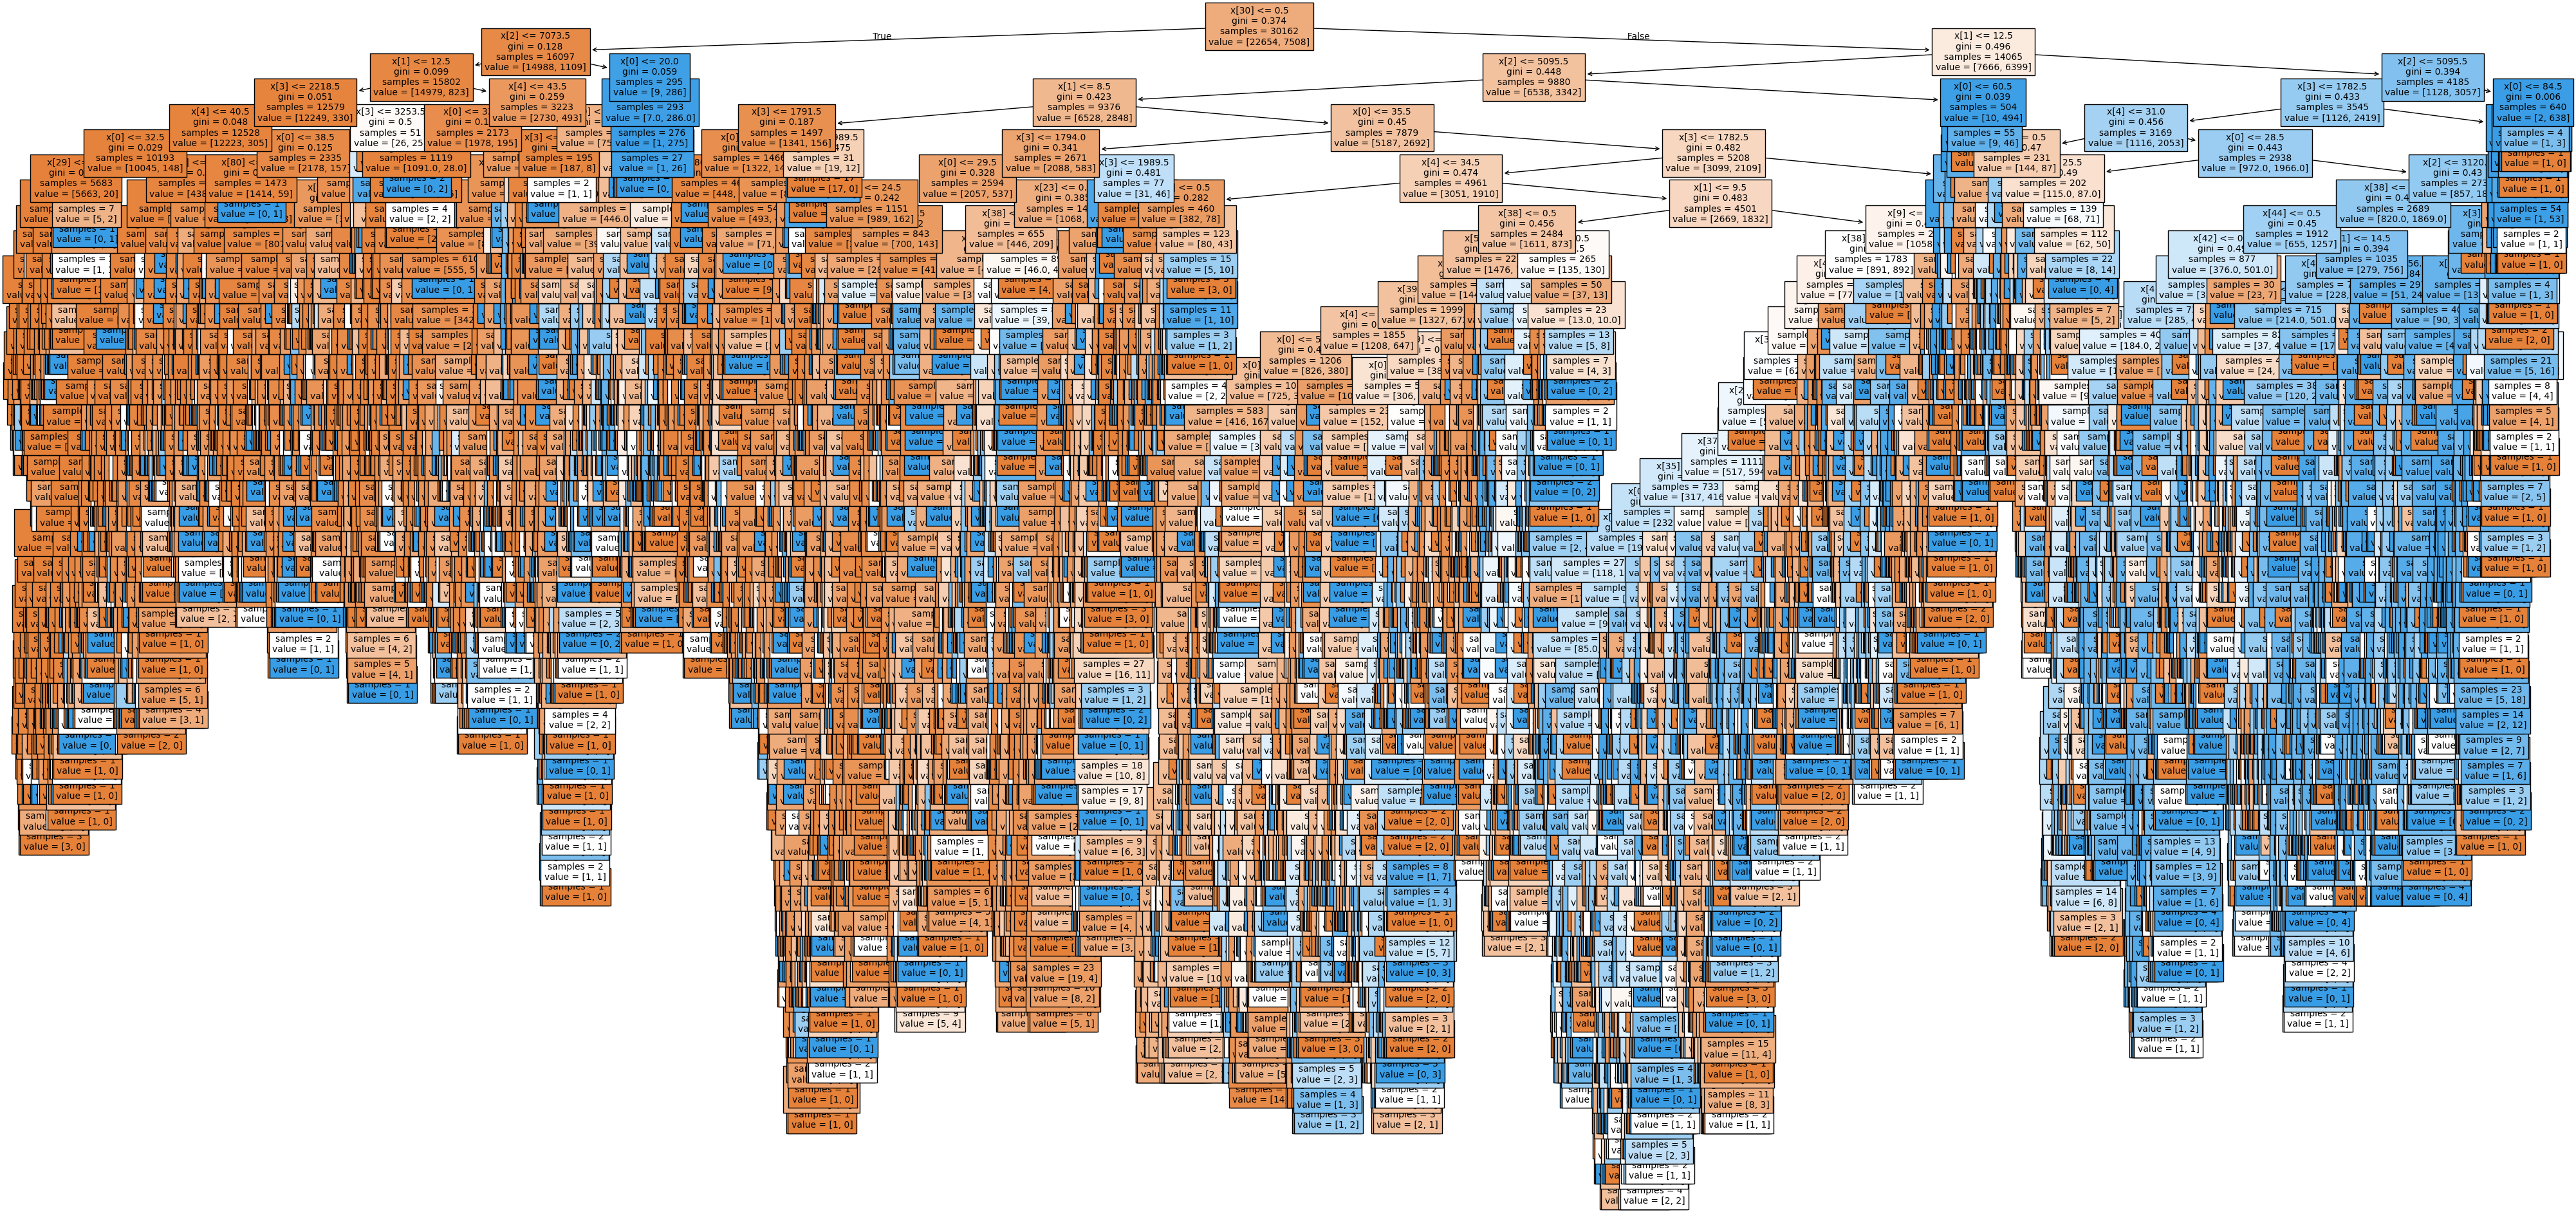

Bùi Hoàn Duy - 6351071012


In [36]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree.png', dpi=10)
plt.show()
print("Bùi Hoàn Duy - 6351071012")


Câu 9

Bùi Hoàn Duy - 6351071012
Accuracy: 0.8029216467463479
Report:
              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



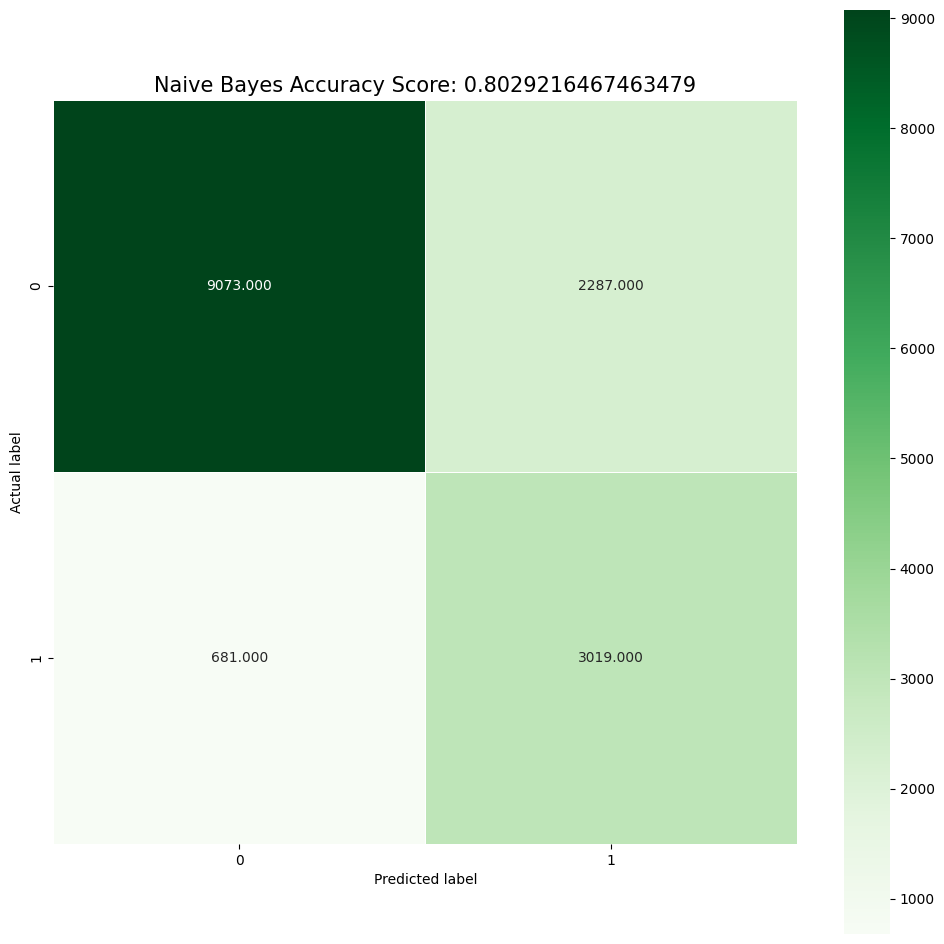

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

gnb = GaussianNB()

bayes_pred = gnb.fit(X_train, y_train).predict(X_test)


print("Bùi Hoàn Duy - 6351071012")

bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)

print("Report:")
print(metrics.classification_report(y_test, bayes_pred))

bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(
    bayes_cm, annot=True, fmt=".3f",
    linewidths=.5, square=True, cmap='Greens'
)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = "Naive Bayes Accuracy Score: {0}".format(bayes_score)
plt.title(title, size=15)
plt.show()


Bùi Hoàn Duy - 6351071012
 MÔ HÌNH: ID3 (Entropy)
Accuracy: 0.8169322709163347
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.63      0.61      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.81      0.82      0.82     15060

 MÔ HÌNH: CART (Gini)
Accuracy: 0.8112217795484727
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060

 MÔ HÌNH: Naive Bayes
Accuracy: 0.8029216467463479
              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

 

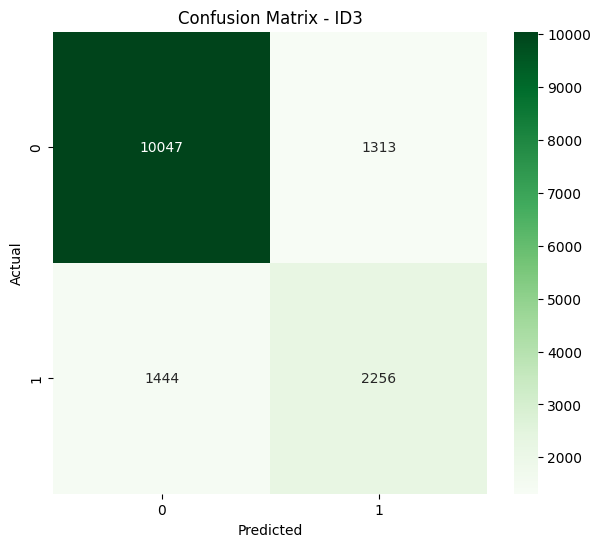

Bùi Hoàn Duy - 6351071012


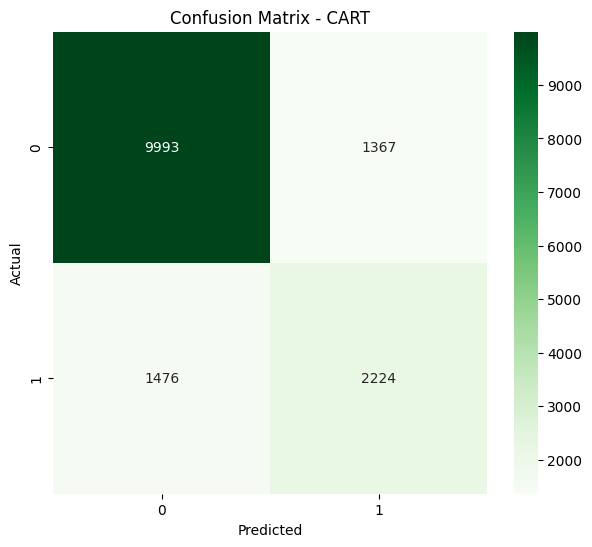

Bùi Hoàn Duy - 6351071012


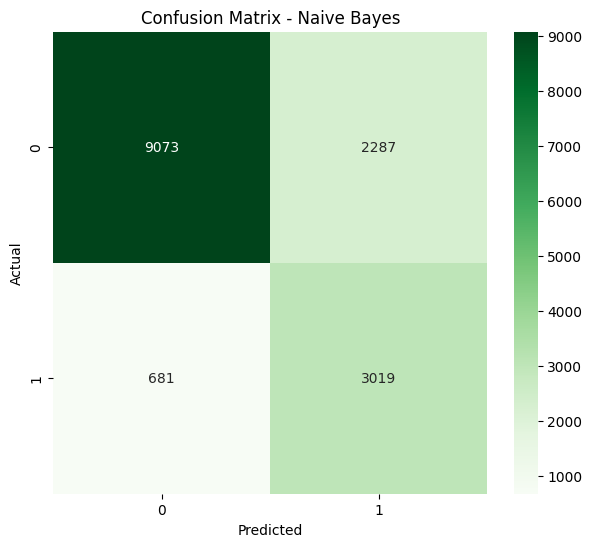

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  1. Train các mô hình
# ID3  (entropy)
from sklearn.tree import DecisionTreeClassifier
id3 = DecisionTreeClassifier(criterion='entropy')
id3.fit(X_train, y_train)
id3_pred = id3.predict(X_test)

# CART (gini)
cart = DecisionTreeClassifier(criterion='gini')
cart.fit(X_train, y_train)
cart_pred = cart.predict(X_test)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

#  2. Tính các độ đo đánh giá
print("Bùi Hoàn Duy - 6351071012")

def evaluate_model(name, y_true, y_pred):
    print("==============================================")
    print(f" MÔ HÌNH: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))


evaluate_model("ID3 (Entropy)", y_test, id3_pred)
evaluate_model("CART (Gini)", y_test, cart_pred)
evaluate_model("Naive Bayes", y_test, nb_pred)
#  3. Vẽ Confusion Matrix
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
print("Bùi Hoàn Duy - 6351071012")
plot_cm(y_test, id3_pred, "Confusion Matrix - ID3")
print("Bùi Hoàn Duy - 6351071012")
plot_cm(y_test, cart_pred, "Confusion Matrix - CART")
print("Bùi Hoàn Duy - 6351071012")
plot_cm(y_test, nb_pred, "Confusion Matrix - Naive Bayes")


### Câu 10

## So sánh các mô hình

### Độ chính xác (Accuracy)

| Mô hình | Accuracy |
|---------|----------|
| **ID3 (Entropy)** | 81.69% |
| **CART (Gini)** | 81.12% | 
| **Naive Bayes** | 80.29% |

### Đánh giá theo lớp

**Lớp <=50K:**
- ID3 & CART: Precision = 0.87, Recall = 0.88 (cân bằng tốt)
- Naive Bayes: Precision = 0.93, Recall = 0.80 (precision cao, recall thấp)

**Lớp >50K:**
- ID3: Precision = 0.63, Recall = 0.61
- CART: Precision = 0.62, Recall = 0.60
- Naive Bayes: Precision = 0.57, Recall = 0.82 (recall cao nhất nhưng precision thấp)

### Kết luận

- **ID3**: Độ chính xác cao nhất, phù hợp khi ưu tiên accuracy tổng thể
- **CART**: Hiệu suất tương tự ID3, tính toán nhanh hơn
- **Naive Bayes**: Recall cao cho lớp thiểu số, phù hợp khi cần phát hiện tối đa các trường hợp >50K
